# Gradient descent

In [1]:
import numpy as np

# Define a function to compute the approximate gradient
# input: multivariate function that range be R; x: position want to calc gradient,represented as a vector; h: parameter to estimate
# output: gradient vector at that position
def compute_gradient(f, x, h=1e-6):
    gradient = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h
        gradient[i] = (f(x_plus_h) - f(x_minus_h)) / (2*h)
    return gradient


def gradient_descent(**kwargs):
    valid_args = {'f', 'initial_point', 'learning_rate', 'max_iterations', 'tolerance'}

    # Check for invalid keyword arguments
    invalid_args = set(kwargs.keys()) - valid_args
    if invalid_args:
        raise ValueError(f"Invalid keyword arguments: {', '.join(invalid_args)}")

    # Check if required keyword arguments are provided
    if 'f' not in kwargs:
        raise ValueError("Function 'f' must be provided.")
    if 'initial_point' not in kwargs:
        raise ValueError("Initial point must be provided.")

    # Extracting keyword arguments with default values
    f = kwargs.get('f')
    initial_point = kwargs.get('initial_point')
    learning_rate = kwargs.get('learning_rate', 0.05)
    max_iterations = kwargs.get('max_iterations', 1000)
    tolerance = kwargs.get('tolerance', 1e-6)

    print('(time, x, f(x)):')
    x = initial_point
    x_list = [np.copy(x)]
    func_list = [f(x)]
    for i in range(max_iterations):
        print(i,x,f(x))
        gradient = compute_gradient(f, x)
        x -= learning_rate * gradient
        x_list.append(np.copy(x))
        func_list.append(f(x))
        if np.linalg.norm(gradient) < tolerance:
            print(f"Gradient descent converged at iteration {i+1}")
            break
    else:
        print("Gradient descent did not converge within the maximum number of iterations.")
    return x, x_list, func_list




# 1d example
Simple quadratic function

In [3]:
# Define the multivariate function
def function(x):
    return x[0]**2-4*x[0] +5
# for this function, we can easily see its minimum value is 1 at x = 2
# start from initial value of 5 for x, we apply gradient descent to find the minimum of the function ...
# the default learning rate was 0.05
x,x_list, func_list = gradient_descent(f = function, initial_point = np.array([5],dtype=float))

(time, x, f(x)):
0 [5.] 10.0
1 [4.7] 8.28999999977356
2 [4.43] 6.904899999569622
3 [4.187] 5.782968999467975
4 [3.9683] 4.87420488961377
5 [3.77147] 4.138105960438587
6 [3.594323] 3.5418658279065074
7 [3.4348907] 3.058911320483931
8 [3.29140163] 2.667718169541029
9 [3.16226147] 2.3508517173752796
10 [3.04603532] 2.094189891032702
11 [2.94143179] 1.8862938116575343
12 [2.84728861] 1.717897987446797
13 [2.76255975] 1.5814973698695454
14 [2.68630377] 1.4710128695855387
15 [2.6176734] 1.3815204243316854
16 [2.55590606] 1.3090315437040108
17 [2.50031545] 1.2503155504027266
18 [2.45028391] 1.2027555958104408
19 [2.40525552] 1.1642320325940654
20 [2.36472996] 1.133027946404619
21 [2.32825697] 1.1077526365806198
22 [2.29543127] 1.0872796356252046
23 [2.26588814] 1.070696504856552
24 [2.23929933] 1.057264168923302
25 [2.2153694] 1.0463839768232024
26 [2.19383246] 1.0375710212225888
27 [2.17444921] 1.030432527184188
28 [2.15700429] 1.0246503470136945
29 [2.14130386] 1.0199667810748894
30 [2.1271

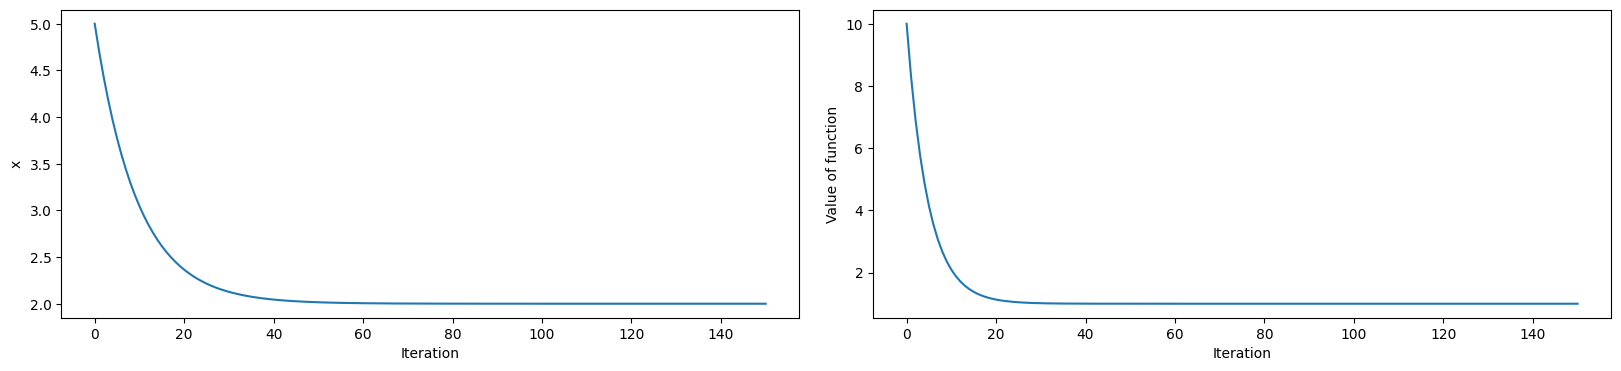

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.plot(x_list)
plt.xlabel("Iteration")
plt.ylabel("x")

plt.subplot(1, 2, 2)
plt.plot(func_list)
plt.xlabel("Iteration")
plt.ylabel("Value of function")

plt.subplots_adjust(wspace=0.1)
plt.show()

## Use higher step size

In [6]:
# use step size = 0.6
x,x_list, func_list = x,x_list, func_list = gradient_descent(f = function, initial_point = np.array([5],dtype=float),learning_rate = 1.1)

(time, x, f(x)):
0 [5.] 10.0
1 [-1.6] 13.960000006642256
2 [6.32] 19.662400006658885
3 [-3.184] 27.873856041438533
4 [8.22080001] 39.69835273438421
5 [-5.46496] 56.72562779083536
6 [10.957952] 81.24490409679524
7 [-8.74954239] 116.55266163775816
8 [14.89945087] 167.39583266903736
9 [-13.47934102] 240.60999847309307
10 [20.57520918] 346.03839616270625
11 [-20.29025108] 497.85529327681
12 [28.74830133] 716.4716239731254
13 [-30.09796168] 1031.2791437611268
14 [40.51755408] 1484.601972288629
15 [-44.22106473] 2137.3868245201793
16 [57.46527744] 3077.3970016076646
17 [-64.55833271] 4431.0116532276015
18 [81.86999877] 6380.2167036850005
19 [-93.84399831] 9187.072011420498
20 [117.01279679] 13228.943424529734
21 [-136.01535532] 19049.23830531512
22 [167.61842641] 27430.463165755817
23 [-196.74210847] 39499.42567885148
24 [240.49052778] 56878.73184107003
25 [-284.18863252] 81904.93338249133
26 [345.42636464] 117942.66793152437
27 [-410.11163515] 169836.9998271969
28 [496.5339646] 244564.84214

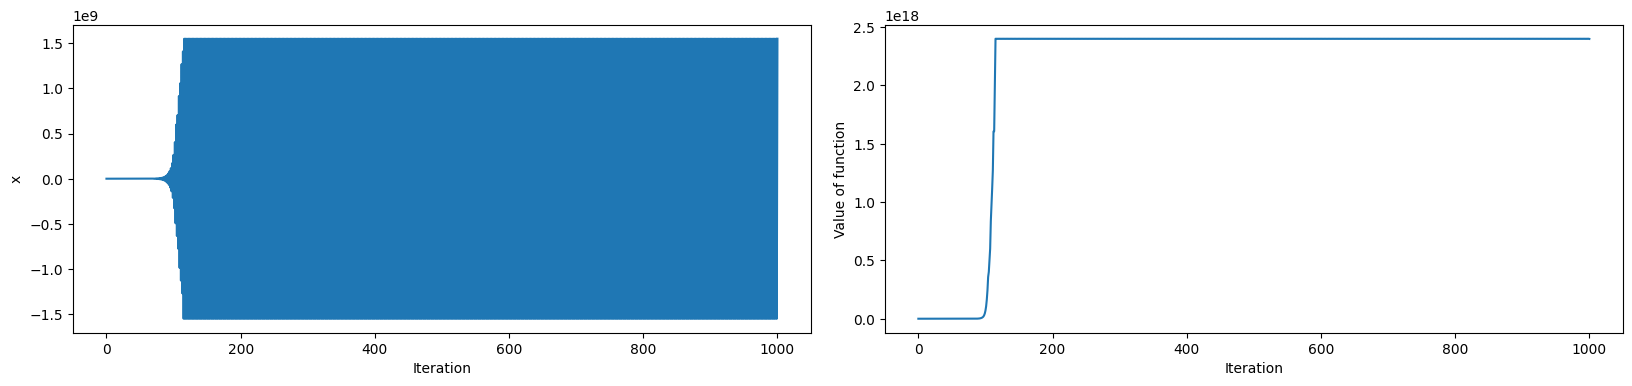

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.plot(x_list)
plt.xlabel("Iteration")
plt.ylabel("x")

plt.subplot(1, 2, 2)
plt.plot(func_list)
plt.xlabel("Iteration")
plt.ylabel("Value of function")

plt.subplots_adjust(wspace=0.1)
plt.show()

# 2d example

In [ ]:
X = np.array([6.4 , 5.12 ,4.1  ,3.28 ,2.62, 2.1 , 1.68 ,1.34 ,1.07])
y = np.array([40.96 ,26.21, 16.78 ,10.74 , 6.87 , 4.4  , 2.81 , 1.8 , 1.15])

In [ ]:
Xa = np.column_stack((np.ones(len(X)), X))
print(Xa)

[[1.   6.4 ]
 [1.   5.12]
 [1.   4.1 ]
 [1.   3.28]
 [1.   2.62]
 [1.   2.1 ]
 [1.   1.68]
 [1.   1.34]
 [1.   1.07]]


In [ ]:
init_weights = np.ones(Xa.shape[1])
print(init_weights)

[1. 1.]


In [ ]:
pred = Xa @ init_weights.T # these are shorthand for numpy.matmul()
print(pred)

[7.4  6.12 5.1  4.28 3.62 3.1  2.68 2.34 2.07]


In [ ]:
def function(w):
  predictions = Xa @ w.T
  # Compute error vector
  error = predictions - y
  return np.sum(error**2)/len(y)

# for this function, we can easily see its minimum value is 1 at x = 2
# start from initial value of 5 for x, we apply gradient descent to find the minimum of the function ...
# the default learning rate was 0.1
w,w_list, func_list = gradient_descent(f = function, initial_point = np.array([0,0], dtype=float), learning_rate = 0.06)

(time, x, f(x)):
0 [0. 0.] 315.6241333333334
1 [1.4896   7.146228] 129.54026776231544
2 [0.16015496 3.09135072] 65.22194351777225
3 [0.48838532 5.57105357] 42.43362084658878
4 [-0.13893951  4.2337338 ] 33.839363730393934
5 [-0.19689028  5.12133281] 30.124361413902502
6 [-0.57582521  4.70746396] 28.113080073506882
7 [-0.7563772   5.05042962] 26.721538417381616
8 [-1.04197734  4.94894674] 25.578387335928294
9 [-1.25581091  5.10423381] 24.555155358385953
10 [-1.50135786  5.10708521] 23.606214408086803
11 [-1.71849266  5.19640829] 22.714256430347447
12 [-1.94257319  5.2328282 ] 21.871714060240492
13 [-2.15322     5.29775811] 21.074426404511314
14 [-2.36257863  5.34374337] 20.31947654422062
15 [-2.56380425  5.39854318] 19.604450452681537
16 [-2.76112949  5.44601544] 18.92718035329019
17 [-2.95231512  5.49564008] 18.285653340213898
18 [-3.13889313  5.54194081] 17.677976506834522
19 [-3.32018835  5.58816922] 17.102361514039014
20 [-3.496808    5.63248129] 16.557115974578565
21 [-3.66860513  5

In [ ]:
pred = Xa @ w.T # these are shorthand for numpy.matmul()
print(pred)

[36.50757506 27.22133688 19.82136582 13.87236949  9.08415292  5.31161866
  2.26457176 -0.20208526 -2.16090113]


Text(0.5, 1.0, 'Fitting a line into dataset')

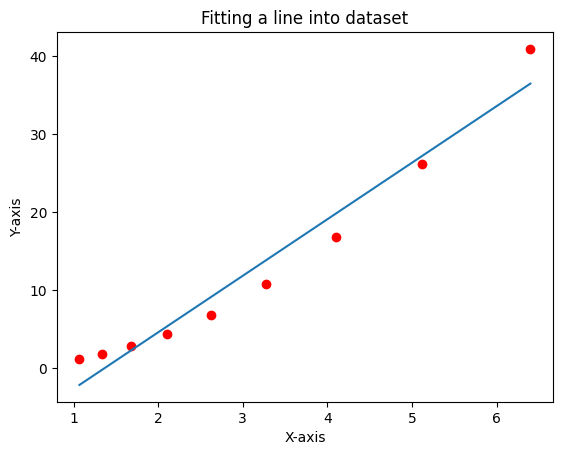

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, pred, label='Fitted Line')
plt.scatter(X, y, color='red', label='Data Points')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Fitting a line into dataset')

# 3d example

Took me way too much time to figure out 3d plotting by gpt
https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/

I guess have to learn it properly someday

(time, x, f(x)):
0 [4. 4.] 32.0
1 [3.2 3.2] 20.479999998568672
2 [2.56 2.56] 13.107199996847497
3 [2.048 2.048] 8.38860799677531
4 [1.6384 1.6384] 5.368709117669021
5 [1.31072 1.31072] 3.435973835513526
6 [1.048576 1.048576] 2.1990232548184334
7 [0.8388608 0.8388608] 1.407374883096014
8 [0.67108864 0.67108864] 0.9007199251733408
9 [0.53687091 0.53687091] 0.5764607521139883
10 [0.42949673 0.42949673] 0.3689348813401339
11 [0.34359738 0.34359738] 0.23611832405963787
12 [0.27487791 0.27487791] 0.15111572740064547
13 [0.21990233 0.21990233] 0.09671406553937147
14 [0.17592186 0.17592186] 0.061897001945025364
15 [0.14073749 0.14073749] 0.03961408124452208
16 [0.11258999 0.11258999] 0.025353011996446313
17 [0.09007199 0.09007199] 0.016225927677762382
18 [0.07205759 0.07205759] 0.010384593713777321
19 [0.05764608 0.05764608] 0.006646139976813002
20 [0.04611686 0.04611686] 0.004253529585158334
21 [0.03689349 0.03689349] 0.002722258934499744
22 [0.02951479 0.02951479] 0.0017422457180816364
23 [0

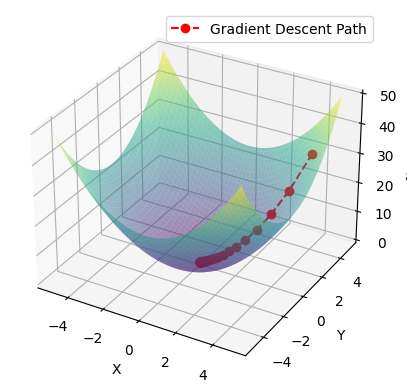

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function and its gradient
def f(x):
    return x[0]**2 + x[1]**2

def fu(x,y):
    return x**2 + y**2

# Define parameters
initial_point = np.array([4, 4],dtype=float)
learning_rate = 0.1

# Perform gradient descent
m, m_list,func_list = gradient_descent(f = f, initial_point = initial_point,learning_rate = 0.1)

# Plot function and gradient descent path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = fu(X,Y)

# Plot function surface
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

# Plot gradient descent path
m_list = np.array(m_list)
ax.plot(m_list[:, 0], m_list[:, 1], fu(m_list[:, 0], m_list[:, 1]), color='red', marker='o', linestyle='dashed', label='Gradient Descent Path')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
#ax.set_title('Gradient Descent Visualization')

# Show the plot
plt.legend()
plt.show()
